# Qiskit 3 - Bell

1. Theoretical introduction
2. Bell state 1 as a Quantum circuit
3. Bell state 1 visualization and analysis

## Theoretical introduction


#### Mathematics
The 4 Bell states represent a 2-qubit maximum entangled system. Consider the 2-qubits A and B:

${\bf A} = |0_a\rangle + |1_a\rangle$

${\bf B} = |0_b\rangle + |1_b\rangle$


Consider furthermore the 4 Bell states notated as $|\psi_i\rangle$:

${\bf |\psi_{00}} \rangle = \frac{|0_a\rangle \otimes |0_b\rangle + |1_a\rangle \otimes |1_b\rangle}{\sqrt2}$

${\bf |\psi_{01}} \rangle = \frac{|0_a\rangle \otimes |0_b\rangle - |1_a\rangle \otimes |1_b\rangle}{\sqrt2}$

${\bf |\psi_{10}} \rangle = \frac{|0_a\rangle \otimes |1_a\rangle + |0_b\rangle \otimes |1_a\rangle}{\sqrt2}$

${\bf |\psi_{11}} \rangle = \frac{|0_a\rangle \otimes |1_a\rangle - |0_b\rangle \otimes |1_a\rangle}{\sqrt2}$


These states can also be represented in the more simplified form as follows:

${\bf |\psi_{00}} \rangle = \frac{|00\rangle + |11\rangle}{\sqrt2}$

${\bf |\psi_{01}} \rangle = \frac{|00\rangle - |11\rangle}{\sqrt2}$

${\bf |\psi_{10}} \rangle = \frac{|01\rangle + |10\rangle}{\sqrt2}$

${\bf |\psi_{11}} \rangle = \frac{|01\rangle - |10\rangle}{\sqrt2}$


#### Quantum circuits
We can assign the state ${\bf |\psi_{00} \rangle}$ for example to our 2 qubits **A** and **B** by the following procedure. Make sure that each qubit are in the states $|0_a\rangle$ and $|0_b\rangle$ respectively. Now apply a Hadamard operator to one of them, and then use that as a control qubit for a Cnot that targets the other. Thats it.

Note though that this procedure can be varied in interesting ways. Recall that **HX = ZH** and so forth.

Note furthermore that this can be generalized such that one can one can reach a bell state from any initial states of our qubits.




## Bell state 1 as a Quantum circuit

We want to achieve the following:

${\bf |\psi_{00} \rangle} = {\bf C_{not}}|0_b \rangle \otimes {\bf H}|0_a \rangle$

Where the superpositioned ${\bf H}|0_a \rangle$ is the control-unit and $|0_a \rangle$ is the target-unit.

In Matrix notation:

${\bf |\psi_{00} \rangle} = \begin{pmatrix}\frac{1}{\sqrt2} \\ 0 \\ 0 \\ \frac{1}{\sqrt2}\end{pmatrix} =$ $\begin{pmatrix}1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$ $( \begin{pmatrix}1_a \\ 0_a \end{pmatrix}$ $\otimes (\frac{1}{\sqrt2}\begin{pmatrix}1 & 1 \\ 1 & -1\end{pmatrix}$ $\begin{pmatrix}1_b \\ 0_b \end{pmatrix}))$

Hence our hypothesis when it comes to measuring such system, is that we will find the Bell state 1 in the state of 00 half of the times and in the state of 11 half of the times.

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [14]:
sim = Aer.get_backend('qasm_simulator')
qubits = QuantumRegister(2)
classical = ClassicalRegister(2)
c1 = QuantumCircuit(qubits, classical)
c1.h(qubits[0])
c1.cx(qubits[0], qubits[1])
c1.measure(qubits, classical)
circuit_drawer(c1)

In [13]:
print(c1.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q3[2];
creg c4[2];
h q3[0];
cx q3[0],q3[1];
measure q3[0] -> c4[0];
measure q3[1] -> c4[1];



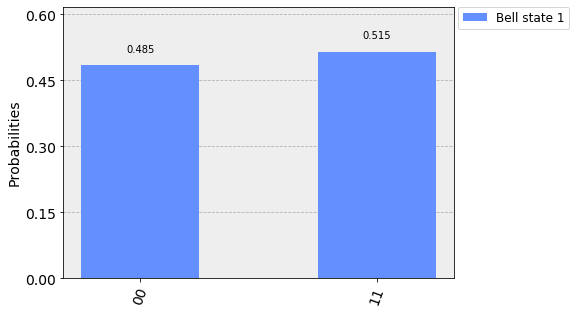

In [15]:
job1 = execute(c1, sim, shots=1000)
result1 = job1.result() 
count1 = result1.get_counts()
plot_histogram(count1, legend=['Bell state 1'])

## Bell state 2

In [28]:
c2 = QuantumCircuit(qubits, classical)
c2.x(qubits[0])
c2.h(qubits[0])
c2.cx(qubits[0], qubits[1])
c2.measure(qubits, classical)
circuit_drawer(c2)

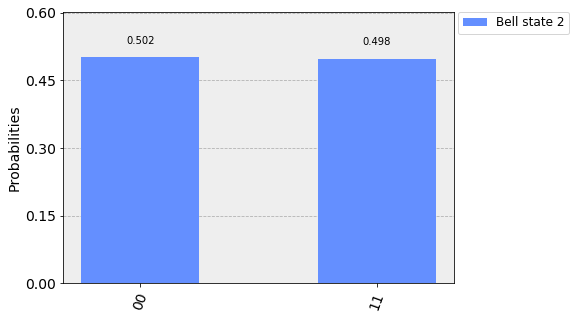

In [29]:
job2 = execute(c2, sim, shots=1000)
result2 = job2.result()
count2 = result2.get_counts()
plot_histogram(count2, legend=['Bell state 2'])

## Bell state 3

In [23]:
c3 = QuantumCircuit(qubits, classical)
c3.x(qubits[1])
c3.h(qubits[0])
c3.cx(qubits[0], qubits[1])
c3.measure(qubits, classical)
circuit_drawer(c3)

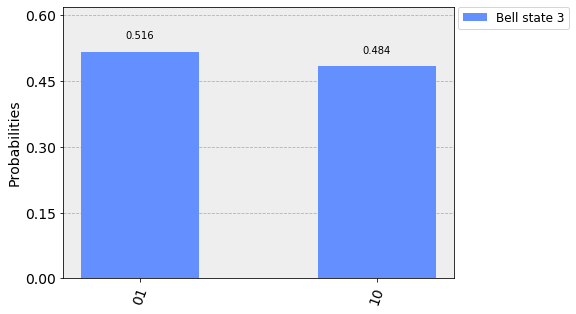

In [24]:
job3 = execute(c3, sim, shots=1000)
result3 = job3.result()
count3 = result3.get_counts()
plot_histogram(count3, legend=['Bell state 3'])

## Bell state 4

In [25]:
c4 = QuantumCircuit(qubits, classical)
c4.x(qubits)
c4.h(qubits[0])
c4.cx(qubits[0], qubits[1])
c4.measure(qubits, classical)
circuit_drawer(c4)

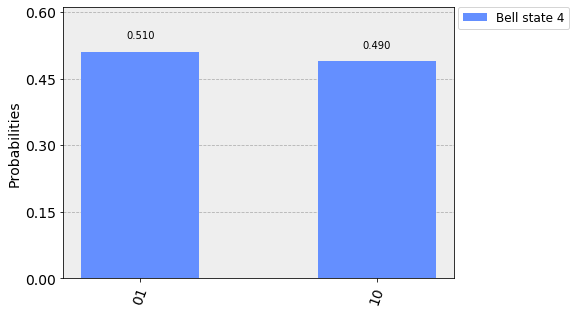

In [26]:
job4 = execute(c4, sim, shots=1000)
result4 = job4.result()
count4 = result4.get_counts()
plot_histogram(count4, legend=['Bell state 4'])

## Visualization of results

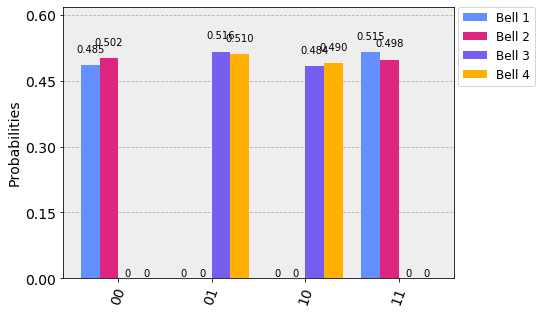

In [30]:
legend = ['Bell 1', 'Bell 2', 'Bell 3', 'Bell 4']
plot_histogram([count1, count2, count3, count4], legend=legend)